## Homework

The dataset, called `homework.xlsx`, consists of the US Monthly EPU Index, obtained from [policyuncertainty.com](https://policyuncertainty.com), and the monthly (non-farm) employment, personal consumption expenditures index, and industrial production series, obtained from [FRED](https://fred.stlouisfed.org) (note that FRED is a great website for quick access to macroeconomic series).

### 1.

Use the variables:
- `News_Based_Policy_Uncert_Index` (the EPU),
- `INDPRO` (industrial production),
- `PCEPI` (personal consumption expenditures index), and
- `PAYEMS` (employment).

Transform the variables `INDPRO`, `PCEPI`, and `PAYEMS` to month-on-month growth rates as:

```
100 * (X_t / X_{t-1} - 1)
```

Use the EPU in levels (no transformation). Use data only from **1985-February to 2019-December**.

#### a.
- What is the coefficient for the lag of the EPU in the INDPRO equation, i.e., phi_(2,1)? What does this coefficient measure? Describe in words.

#### b.
- Describe in words what the EPU tries to measure.

---

### 2.

Using the same VAR, estimate impulse response functions for a **shock to the economic policy uncertainty index** using the same contemporaneous restrictions as used in class. That is, the EPU reacts contemporaneously only to the shock ε₁,ₜ.

#### a.
- Plot the impulse response function for the log-level of employment and industrial production including **95% confidence bands**.

#### b.
- Include the plots into your answer PDF and describe what you see — how do employment and industrial production react to an economic policy uncertainty shock?  
- Describe in words what these impulse response functions mean.

---

### 3.

Read the report of Ben Bernanke about the forecasting practices of the Bank of England, available [here](https://www.bankofengland.co.uk/report/2022/forecasting-for-the-future).

#### a.
- Summarize in your own words **Recommendation 9 to 11** of the report.


In [1]:
import pandas as pd
from statsmodels.tsa.api import VAR

In [2]:
df = pd.read_excel("homework.xlsx", parse_dates=True, index_col='Dates').rename(columns={'News_Based_Policy_Uncert_Index': 'EPU'})

# Restrict sample period
df = df.loc["1985-02":"2019-12"]

# Compute month-on-month growth rates for the 3 real variables
for col in ["INDPRO", "PCE", "PAYEMS"]:
    df[f"{col}_GR"] = 100 * df[col].pct_change()

# Drop NaN from first difference
df_clean = df[["EPU", "INDPRO_GR", "PCE_GR", "PAYEMS_GR"]].dropna()

df_clean

,EPU,INDPRO_GR,PCE_GR,PAYEMS_GR
Dates,,,,
1985-03-01,100.761475,0.131622,0.391042,0.351284
1985-04-01,84.778863,-0.196626,0.146307,0.202392
1985-05-01,98.053653,0.148172,0.237165,0.282364
1985-06-01,119.597149,-0.047674,0.270674,0.151061
1985-07-01,111.415115,-0.517168,0.245403,0.193928
...,...,...,...,...
2019-08-01,282.522931,0.736888,0.034516,0.153766
2019-09-01,186.640697,-0.237314,0.068100,0.136985
2019-10-01,159.511393,-0.906356,0.195995,0.085251


In [3]:
model = VAR(df_clean)
results = model.fit()
results.summary()

c:\Users\maxim\Documents\BSE_Term_3\DSDM_Forecasting\BdE\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Jun, 2025
Time:                     14:35:22
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -2.26090
Nobs:                     417.000    HQIC:                  -2.37786
Log likelihood:          -1835.06    FPE:                  0.0859209
AIC:                     -2.45433    Det(Omega_mle):       0.0819206
--------------------------------------------------------------------
Results for equation EPU
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               46.364256         5.340935            8.681           0.000
L1.EPU               0.640606         0.037954           16.879           0.000
L1.INDPRO_GR        -3.192960         2.828234           -1.129   

In [4]:
irf = results.irf(10)
help(irf.plot)

Help on method plot in module statsmodels.tsa.vector_ar.irf:

plot(orth=False, *, impulse=None, response=None, signif=0.05, plot_params=None, figsize=(10, 10), subplot_params=None, plot_stderr=True, stderr_type='asym', repl=1000, seed=None, component=None) method of statsmodels.tsa.vector_ar.irf.IRAnalysis instance
    Plot impulse responses
    
    Parameters
    ----------
    orth : bool, default False
        Compute orthogonalized impulse responses
    impulse : {str, int}
        variable providing the impulse
    response : {str, int}
        variable affected by the impulse
    signif : float (0 < signif < 1)
        Significance level for error bars, defaults to 95% CI
    subplot_params : dict
        To pass to subplot plotting funcions. Example: if fonts are too big,
        pass {'fontsize' : 8} or some number to your taste.
    plot_params : dict
    
    figsize : (float, float), default (10, 10)
        Figure size (width, height in inches)
    plot_stderr : bool, defa

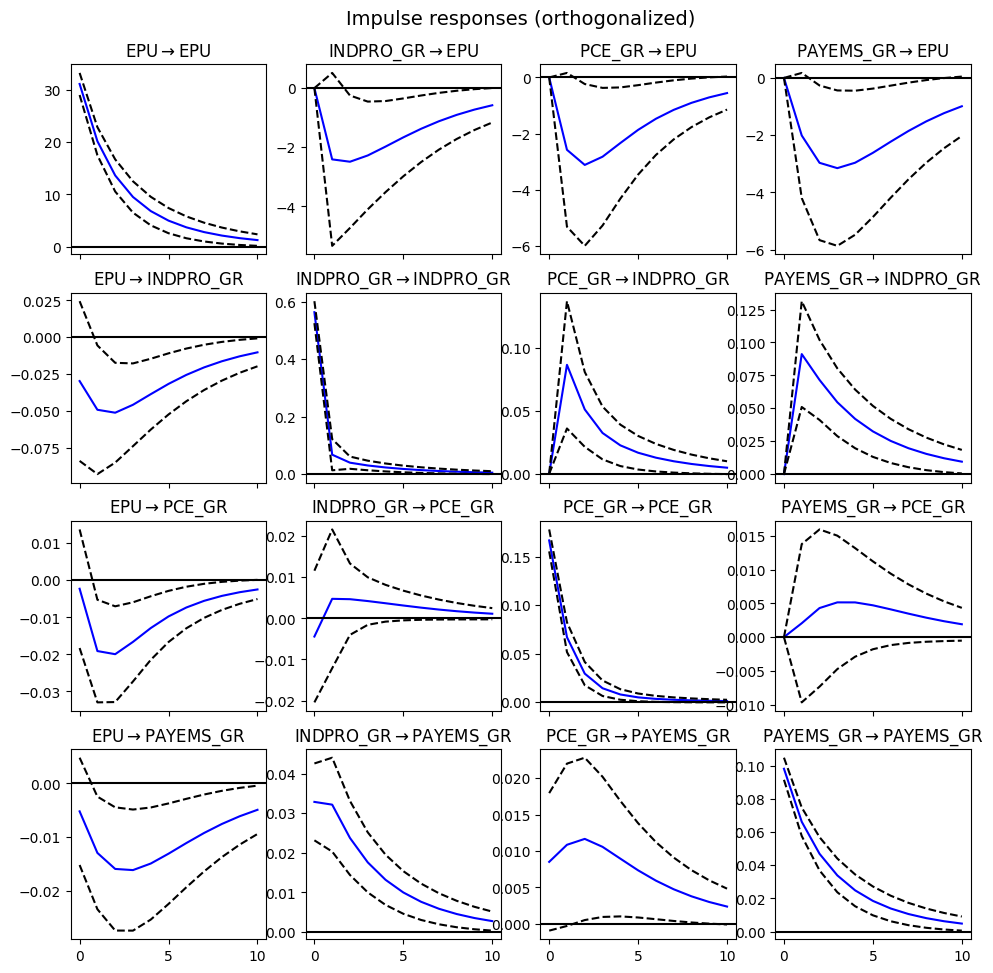

In [5]:
irf.plot(orth=True);